In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from scipy import stats

In [ ]:
#Execute essa célula para acessar o df usado\n",
!wget -q https://github.com/GabrielaPMRS/data-science/raw/refs/heads/main/lista_1/vendas.csv

#QUESTÃO 1

In [ ]:
arquivo_csv = "vendas.csv"
df = pd.read_csv(arquivo_csv)

print(df.head())


         Data   Produto  Quantidade    Preço
0  2024-02-04   Monitor           3  1748.66
1  2024-01-18  Notebook          10  1843.12
2  2024-01-13   Teclado           0     0.00
3  2024-01-15   Cadeira           8   311.26
4  2024-02-19   Teclado           6  1472.34


#QUESTÃO 2

In [15]:
df.replace({"": None, 0: None}, inplace=True)

df.dropna(inplace=True)

df.loc[:, "Data"] = pd.to_datetime(df["Data"], errors='coerce')

df.loc[:, "Quantidade"] = (df["Quantidade"] - df["Quantidade"].min()) / (df["Quantidade"].max() - df["Quantidade"].min())

print(df.head())


                  Data   Produto Quantidade    Preço
0  2024-02-04 00:00:00   Monitor   0.222222  1748.66
1  2024-01-18 00:00:00  Notebook        1.0  1843.12
3  2024-01-15 00:00:00   Cadeira   0.777778   311.26
4  2024-02-19 00:00:00   Teclado   0.555556  1472.34
5  2024-02-20 00:00:00   Cadeira   0.888889  1356.92


#QUESTÃO 3

In [16]:
#print(df)
mean = df["Preço"].mean()

median = df["Preço"].median()

std = df["Preço"].std()

mode = df["Preço"].mode()


print(f"Média: {mean}")
print(f"Mediana: {median}")
print(f"Desvio Padrão: {std}")
if len(mode) == 1:
    print(f"Moda: {mode[0]}")
elif len(mode) > 1 and len(mode) < len(df["Preço"].unique()):
    print(f"Modas (multimodal): {', '.join(map(str, mode))}")
else:
    print("Moda: Não há moda nos dados")

Média: 1013.9882222222222
Mediana: 996.0
Desvio Padrão: 571.253688507244
Moda: Não há moda nos dados


#QUESTÃO 4

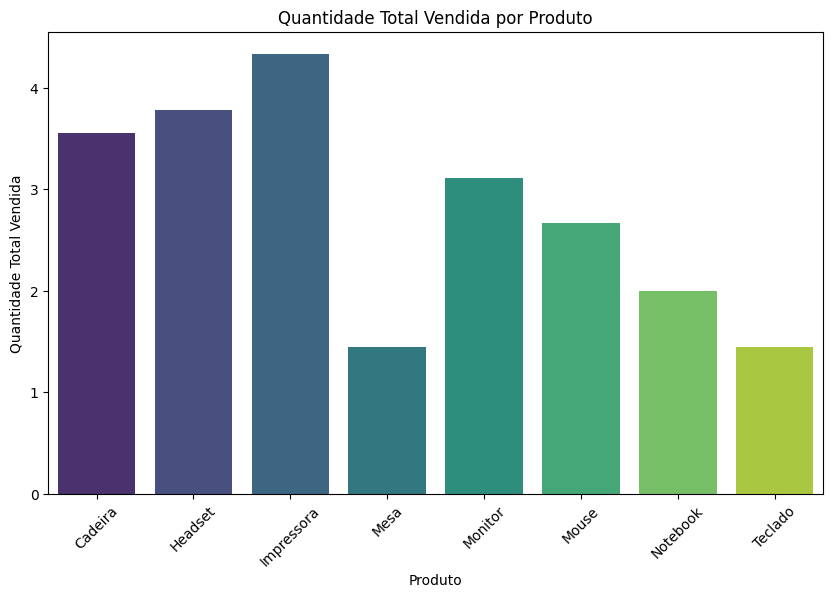

In [17]:
df_grouped = df.groupby("Produto")["Quantidade"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x="Produto", y="Quantidade", hue="Produto", data=df_grouped, palette="viridis", legend=False)
plt.xlabel("Produto")
plt.ylabel("Quantidade Total Vendida")
plt.title("Quantidade Total Vendida por Produto")
plt.xticks(rotation=45)
plt.show()


#QUESTÃO 5

Matriz de Confusão:
 [[3 1]
 [1 4]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.80      0.80      0.80         5

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9



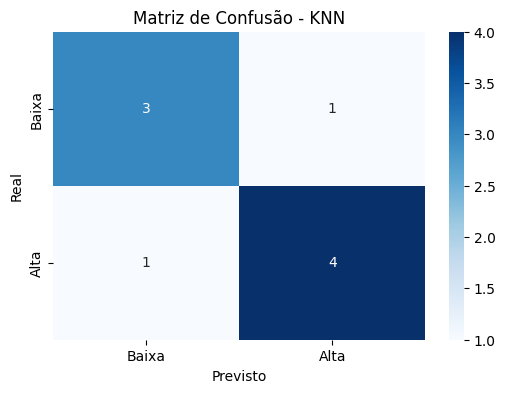

In [18]:
media_quantidade = df["Quantidade"].mean()
df["Alta_Venda"] = (df["Quantidade"] > media_quantidade).astype(int)
#print(media_quantidade)
#print(df)

X = df[["Preço", "Quantidade"]]  # Features 
y = df["Alta_Venda"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baixa", "Alta"], yticklabels=["Baixa", "Alta"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - KNN")
plt.show()


#QUESTÃO 6

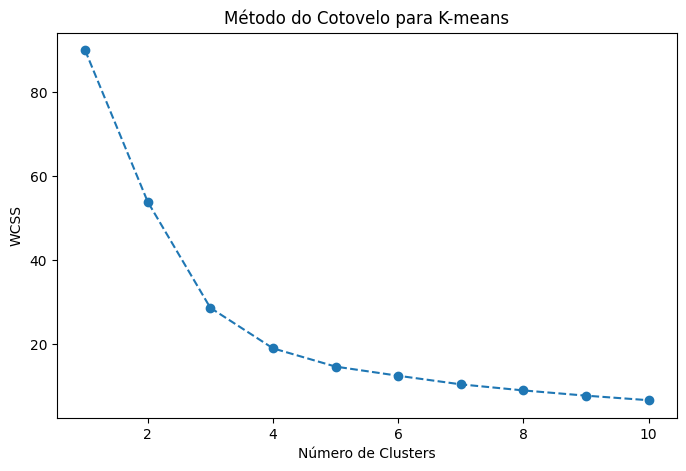

In [19]:
X_cluster = df[["Preço", "Quantidade"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Método do Cotovelo 
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS")
plt.title("Método do Cotovelo para K-means")
plt.show()

num_clusters = 3 #analise do gráfico


#QUESTÃO 7

Cluster	            Preço	        Quantidade Vendida	Característica
Cluster 0 (Roxo)	Médio a Alto	Baixo	            Produtos caros, mas com pouca demanda
Cluster 1 (Azul)	Baixo a Médio	Alto	            Produtos acessíveis e muito vendidos
Cluster 2 (Amarelo)	Alto	        Alto	            Produtos premium que ainda vendem bem

#QUESTÃO 8

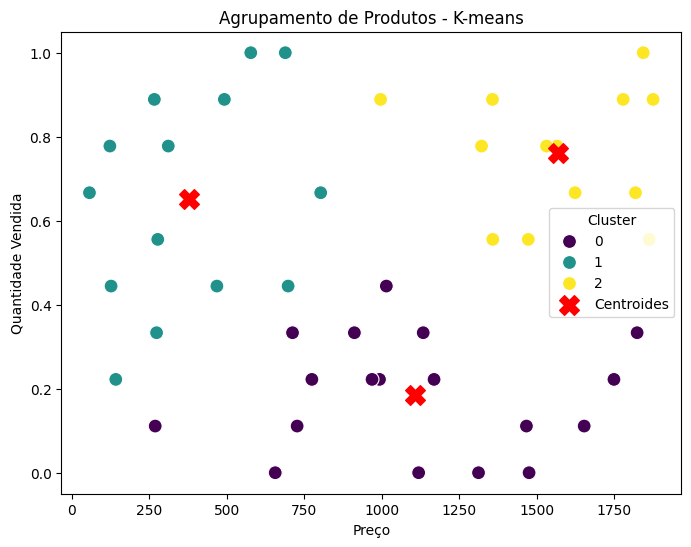

In [20]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Preço"], y=df["Quantidade"], hue=df["Cluster"], palette="viridis", s=100)

# Adicionar os centroides dos clusters
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="X", s=200, label="Centroides")

plt.xlabel("Preço")
plt.ylabel("Quantidade Vendida")
plt.title("Agrupamento de Produtos - K-means")
plt.legend(title="Cluster")
plt.show()





#QUESTÃO 9

In [21]:
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")

print("Acurácias obtidas em cada fold:", scores)
print("Média da acurácia:", scores.mean())
print("Desvio padrão da acurácia:", scores.std())


Acurácias obtidas em cada fold: [0.875 1.    1.    1.    1.   ]
Média da acurácia: 0.975
Desvio padrão da acurácia: 0.049999999999999996


Os resultados mostraram uma média de acurácia de 97,5%, com um desvio padrão de apenas 5%, indicando que o modelo é consistente e tem baixa variação entre as diferentes divisões dos dados. No entanto, a predominância de acurácias perfeitas pode indicar um possível overfitting, ou seja, o modelo pode estar se ajustando demais aos dados de treino.

#QUESTÃO 10
Cluster	Preço		Estratégia de Marketing
Cluster 0 (Roxo)	Reduzir o preço ou oferecer descontos para aumentar a atratividade
Cluster 1 (Azul)	Manter o preço e investir em campanhas para fidelizar clientes
Cluster 2 (Amarelo)	Estratégias de exclusividade e diferenciação para justificar o preço

In [22]:
df['Novo_Preço'] = df['Preço']
df['Nova_Quantidade'] = df['Quantidade']

df.loc[df['Cluster'] == 0, 'Novo_Preço'] *= 0.90  # Redução de 10%
df.loc[df['Cluster'] == 0, 'Nova_Quantidade'] *= 1.3  # Aumento de 30%

df.loc[df['Cluster'] == 1, 'Nova_Quantidade'] *= 1.05  # Aumento de 5%

df.loc[df['Cluster'] == 2, 'Novo_Preço'] *= 1.02  # Pequeno aumento de 2% no preço
df.loc[df['Cluster'] == 2, 'Nova_Quantidade'] *= 1.05  # Aumento de 5% na demanda


print(df)


                   Data     Produto Quantidade    Preço  Alta_Venda  Cluster  \
0   2024-02-04 00:00:00     Monitor   0.222222  1748.66           0        0   
1   2024-01-18 00:00:00    Notebook        1.0  1843.12           1        2   
3   2024-01-15 00:00:00     Cadeira   0.777778   311.26           1        1   
4   2024-02-19 00:00:00     Teclado   0.555556  1472.34           1        2   
5   2024-02-20 00:00:00     Cadeira   0.888889  1356.92           1        2   
6   2024-01-14 00:00:00     Monitor   0.888889  1874.88           1        2   
7   2024-01-28 00:00:00     Cadeira   0.555556   277.37           1        1   
8   2024-01-16 00:00:00  Impressora   0.555556  1357.89           1        2   
9   2024-01-27 00:00:00     Teclado   0.333333  1823.35           0        0   
10  2024-02-25 00:00:00    Notebook   0.222222   774.43           0        0   
11  2024-02-01 00:00:00       Mouse   0.444444   697.74           0        1   
13  2024-01-30 00:00:00     Headset   0.

In [23]:
df['Quantidade'] = pd.to_numeric(df['Quantidade'], errors='coerce')
df['Nova_Quantidade'] = pd.to_numeric(df['Nova_Quantidade'], errors='coerce')

df = df.dropna(subset=['Quantidade', 'Nova_Quantidade'])
t_stat, p_value = stats.ttest_rel(df['Quantidade'], df['Nova_Quantidade'])

if p_value < 0.05:
    print("Há uma diferença estatisticamente significativa nas vendas após a implementação das estratégias.")
else:
    print("Não há diferença significativa nas vendas após as mudanças.")


Há uma diferença estatisticamente significativa nas vendas após a implementação das estratégias.


* Cluster 0 (Produtos Caros, Baixa Demanda)
Estratégia: Redução de preço em 10% e campanhas promocionais para aumentar a demanda.

* Cluster 1 (Produtos Acessíveis e Muito Vendidos)
Estratégia: Manutenção dos preços e investimento em fidelização de clientes para garantir crescimento sustentável nas vendas.

* Cluster 2 (Produtos Premium com Boa Venda)
Estratégia: Aumento de 2% no preço e reforço da percepção de exclusividade e valor premium para consumidores fiéis.

Para verificar o impacto das estratégias, comparamos as quantidades vendidas antes e depois da implementação das mudanças usando o teste t pareado.
O teste t indicou que a diferença nas vendas foi significativa (p < 0.05), sugerindo que as estratégias implementadas tiveram um efeito real no comportamento dos consumidores.

Os resultados indicam que as estratégias de marketing aplicadas foram eficazes, promovendo crescimento nas vendas e otimizando a precificação dos produtos de acordo com seu perfil de mercado. A análise estatística confirmou que as mudanças não foram apenas aleatórias, mas sim significativamente impactantes. 